In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

thr 0.05, a_s10, v_s 1


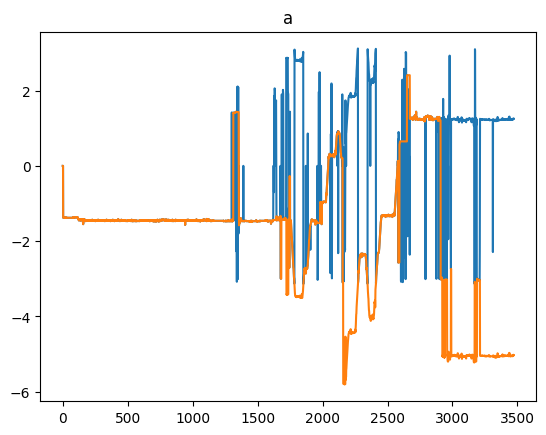

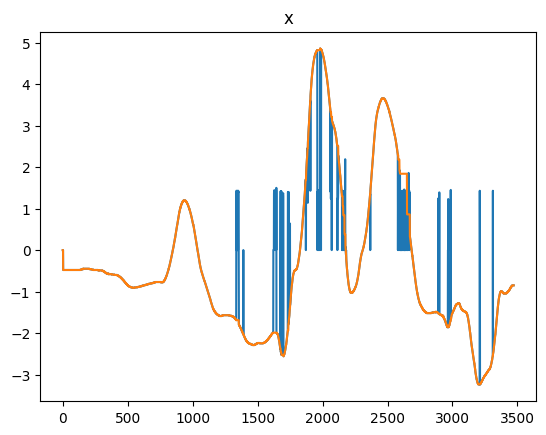

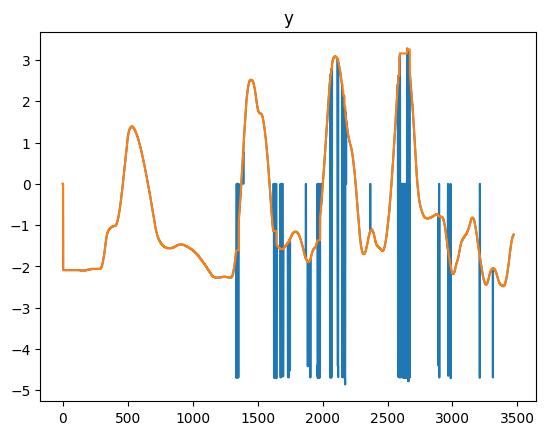

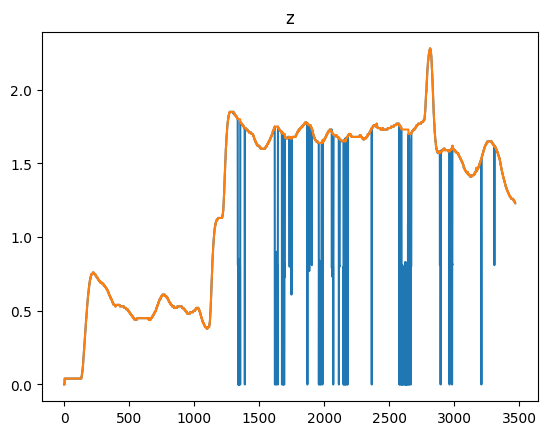

In [122]:
run = '3f'
thr = 0.05
v_s = 1
a_s = 10

os.system("../build/filter_test ../data/{} {:.3f} {:.3f} {:.3f}".format(run, thr, a_s, v_s))

df = pd.read_csv("../data/" + run, header=None, names=['x', 'y', 'z', 'a', 'roll', 'pitch', 'throttle', 'yaw'])
df_f = pd.read_csv("../data/" + run + "_filt", header=None, names=['x', 'y', 'z', 'a', 'roll', 'pitch', 'throttle', 'yaw'])


a = df['a'].to_numpy()
a_f = df_f['a'].to_numpy()

for i, coord in enumerate(['a', 'x', 'y', 'z']):
	plt.plot(df[coord])
	plt.plot(df_f[coord])
	plt.title(coord)
	plt.show()